<a href="https://colab.research.google.com/github/ITU-Business-Analytics-Team/Business_Analytics_for_Professionals/blob/main/Part%20II%20%3A%20Business%20Applications/Chapter%2014%3A%20Human%20Resources%20Analytics/14_3_Recruitment_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Human Resources Analytics**
## Recruitment Analytics

### **Assessing Recruitment Source Through Employee Performance & Engagement**

In this usecase, an analytics approach was applied to a HR data set to assess the best medium for hiring. The data set used in this case is a modified version of IBM HR Analytics Employee Attrition Data and is available from this [link](https://drive.google.com/file/d/1tHHqOY61G1PgGQDx1G9NAzVYxS_Muran/view?usp=sharing).

**Problem Definition:** \\
Which recruitment source is better to ensure employee performance?

####**Importing Required Libraries and Components**

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


#### **Import Data**

In [ ]:
url = "https://drive.google.com/file/d/1tHHqOY61G1PgGQDx1G9NAzVYxS_Muran/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,EmpID,PerformanceScore,OrgEngagement,PositionEngagement,HireSource
0,Emp1,18.5,0.87,0.02,Applied Online
1,Emp2,35.3,0.18,0.39,Campus
2,Emp3,67.9,2.75,3.11,Referral
3,Emp4,35.0,1.70,0.92,Campus
4,Emp5,27.5,0.35,0.38,Referral


The data set includes **Performance Score**, **Organizational Engagement Score**, **Positonal Engagement Score** and **source of hiring** for 852 employees in a company. 

In [ ]:
df.shape

(852, 5)

In [ ]:
df.dtypes

EmpID                  object
PerformanceScore      float64
OrgEngagement         float64
PositionEngagement    float64
HireSource             object
dtype: object

Brief statistical analysis of numerical variables showed that the performance score deviates between 0 and 100, whereas engagament scores deviate between 0 and 5.

In [ ]:
df.describe()

,PerformanceScore,OrgEngagement,PositionEngagement
count,852.000000,852.000000,852.000000
mean,48.786033,1.578462,1.448732
std,15.946943,1.044412,1.001947
min,0.000000,0.000000,0.000000
25%,37.975000,0.760000,0.660000
50%,48.500000,1.375000,1.250000
75%,59.925000,2.270000,2.130000
max,100.000000,5.000000,5.000000


If we check the correlation between numerical features, we can see that Organizational and Positional Engagement scores are  highly correlated (0.83). Additionally, Performance score is correlated with Position Engagement with a correlation coefficient 0.65 but less correlated with Organizational Engagement with a coefficient of 0.54.

In [ ]:
df[["PerformanceScore","OrgEngagement","PositionEngagement"]].corr()

,PerformanceScore,OrgEngagement,PositionEngagement
PerformanceScore,1.000000,0.540537,0.652238
OrgEngagement,0.540537,1.000000,0.833507
PositionEngagement,0.652238,0.833507,1.000000


In order to select the best hiring source, we have define our target variable using engagement and performance scores. Since organizational engagement is related with employee commitment to the company and positional engagement is related with employee's willingness to stay in the current role, both of them are related with long-term indiviual performance. 

By using these 3 indicators, employee data will be segmented and every employee will be classified in a segment which will represent their engagement and performance scores.

The segmentation will be conducted by applying a unsupervised machine learning algorithm and on the next step, hiring sources will be evaluated according to these created segments.

### **Segmentation Model**

In [ ]:
dfx = df[["PerformanceScore","OrgEngagement","PositionEngagement"]]


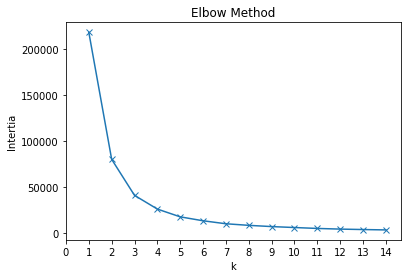

In [ ]:
intertia = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dfx)
    intertia.append(km.inertia_)
plt.plot(K, intertia, marker= "x")
plt.xlabel('k')
plt.xticks(np.arange(15))
plt.ylabel('Intertia')
plt.title('Elbow Method')
plt.show()

By using KMeans clustering algorithm and elbow method, optimum number of clusters weere determined as 4 

In [ ]:
# Perform K-means algorithm for 3 clusters
km = KMeans(n_clusters=3, n_init = 3, init = "random", random_state = 42)
km.fit(dfx)
y_kmeans = km.predict(dfx)

df["Perf_Cluster"] = y_kmeans


In [ ]:
df["Perf_Cluster"].value_counts()

2    385
1    234
0    233
Name: Perf_Cluster, dtype: int64

Cluster column were created and each employee within the data set were assigned to a cluster as "0", "1" and "2". 

For the next step, determined clusters were analyzed to identify the common characteristics. To do so, we plotted them according to the input variables to understand the employees within each group.

Text(0, 0.5, 'PositionEngagement')

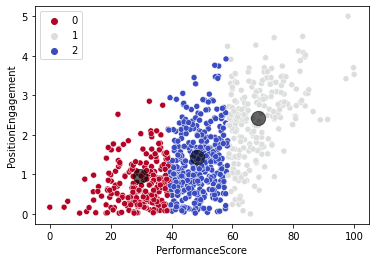

In [ ]:
# Plot clusters - this is done by colour coding the data points according to which cluster the data point belongs to
sns.scatterplot(data=dfx, x="PerformanceScore", y="PositionEngagement", hue= y_kmeans, palette = "coolwarm_r")
centers = km.cluster_centers_
# Plot centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha = 0.6);
plt.xlabel("PerformanceScore")
plt.ylabel("PositionEngagement")

Text(0, 0.5, 'OrgEngagement')

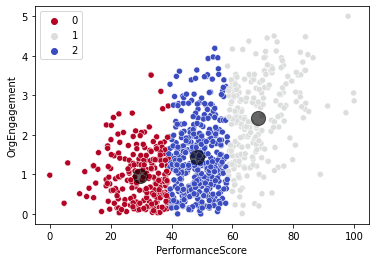

In [ ]:
# Plot clusters - this is done by colour coding the data points according to which cluster the data point belongs to
sns.scatterplot(data=dfx, x="PerformanceScore", y="OrgEngagement", hue= y_kmeans, palette = "coolwarm_r")
centers = km.cluster_centers_
# Plot centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha = 0.6);
plt.xlabel("PerformanceScore")
plt.ylabel("OrgEngagement")

Text(0, 0.5, 'OrgEngagement')

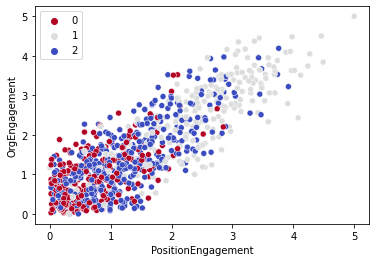

In [ ]:
# Plot clusters - this is done by colour coding the data points according to which cluster the data point belongs to
sns.scatterplot(data=dfx, x="PositionEngagement", y="OrgEngagement", hue= y_kmeans, palette = "coolwarm_r")
#centers = km.cluster_centers_
# Plot centers
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha = 0.6);
plt.xlabel("PositionEngagement")
plt.ylabel("OrgEngagement")

The scatter plots and visualizations with created segments showed that performance cluster 
* 0 indicates employees with low level of engagement and performance as "Low" 
* 2 indicates employees with mid-level performance level and mid-level engagement : "Medium"
* 1 indicates employees with high performance and high engagement : "High"

Since, engagement is an important factor for sustainable performance it is possible say that hiring source with more employees in class 1 is a better source for recruiting engaged and high-performer employees. 

In [ ]:
df["Perf_Cluster"] = df["Perf_Cluster"].replace([0, 2, 1], ["Low","Mid","High"])

In [ ]:
# Percentage of employees within clusters

(df["Perf_Cluster"].value_counts() / df.shape[0]*100).round(1)

Mid     45.2
High    27.5
Low     27.3
Name: Perf_Cluster, dtype: float64

In [ ]:
# Percentage of employees within hire source and clusters

perf_source_count = df.groupby(['HireSource',"Perf_Cluster"])['EmpID'].count().rename("count")

perf_source_percent = (perf_source_count / perf_source_count.groupby(level=0).sum()*100).round(1)

perf_source_percent

HireSource      Perf_Cluster
Applied Online  High            29.1
                Low             26.5
                Mid             44.4
Campus          High            27.6
                Low             30.0
                Mid             42.4
Referral        High            22.5
                Low             26.4
                Mid             51.1
Search Firm     High            34.4
                Low             21.9
                Mid             43.8
Name: count, dtype: float64

When we compare the total distribution of high performers for each hiring source, it is possible to say that **'Search Firm'** has the  highest high performer ratio with **%34.4** which is higher than the overall average (%27.5)

On the other hand, it is possible to say that the hiring source 'Referrals' has the lowest high performer ration with %22.5 which is lower than the overall average (%27.5) 

As a result, a clustering approach based on the performance and engagement scores of employees showed us that **'Search Firm'** is the best hiring source to ensure long-term success within the company.


## **REFERENCES**

(1) https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset